In [1]:
import os
import netCDF4 as nc
import numpy as np
import pandas as pd

import copy

import scipy.io as io
import scipy.stats as stats
from scipy import signal
from scipy.stats import mode
from scipy.linalg import eig
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors, colorbar
%matplotlib inline
from matplotlib.animation import FuncAnimation
import seaborn as sns

from skimage import measure
from skimage.filters import gaussian

from impdar import *

In [2]:
#files on disk
green_image = '../images/nline5.png'
green_mat = '../data/nline5_migtk_cropped.mat'

#load in data
dat = io.loadmat(green_mat)
data = dat['data']

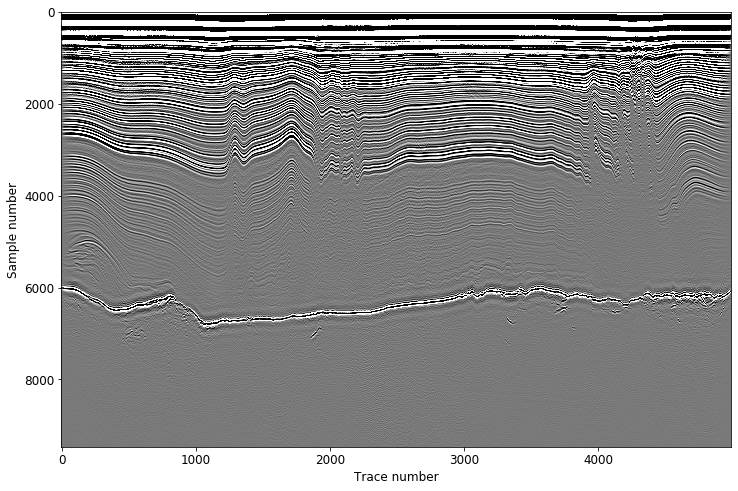

In [3]:
#original image
mini = -8.774235248565674
maxi = 9.667154026031533

fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.xlabel('Trace number', fontsize=12)
plt.ylabel('Sample number', fontsize=12)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

### Contouring

In [4]:
#get positive and negative contours
pos = measure.find_contours(data, 3)
neg = measure.find_contours(data, -3)

In [5]:
#save contours and their lengths to lists
c_pos, c_neg, c_length_pos, c_length_neg = [], [], [], []

In [6]:
#positive contours
for contour in pos:
    c_pos.append(contour)
print('Done!\n')

#negative contours
for contour in neg:
    c_neg.append(contour)
print('Done!\n') 

#now extract long contours
#this could be done instead of filtering?
for contour in pos:
    c_length_pos.append(len(contour))
print('Done!\n')
    
for contour in neg:
    c_length_neg.append(len(contour))
print('Done!\n')

Done!

Done!

Done!

Done!



In [7]:
#find the longest contour
print(np.argmax(c_length_pos))
print(c_length_pos[38])

print(np.argmax(c_length_neg))
print(c_length_neg[298])

#create an iterable list of the contours that are longer than some arbitrary value
long_contours_pos = list(np.where(np.array(c_length_pos) > 500)[0])
long_contours_neg = list(np.where(np.array(c_length_neg) > 500)[0])

38
44400
298
30373


In [8]:
#isolate some contours
last_long_idx = long_contours_pos[-30:]
last_long_contours = [pos[idx] for idx in last_long_idx]

### find end points

In [9]:
argx3 = np.argmin(last_long_contours[1][:, 1])
argx4 = np.argmax(last_long_contours[1][:, 1])

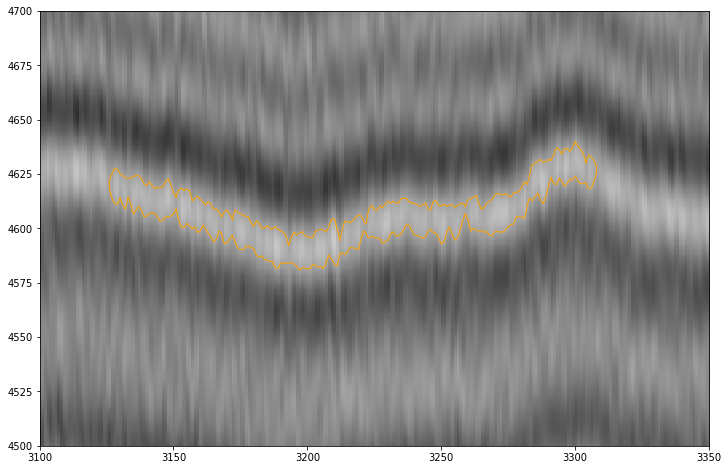

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.plot(last_long_contours[1][:, 1], last_long_contours[1][:, 0], color='orange', linewidth=1)

#ax.scatter(last_long_contours[1][argx3, 1], last_long_contours[1][argx3, 0], color='yellow', marker='o', s=20)
#ax.scatter(last_long_contours[1][argx4, 1], last_long_contours[1][argx4, 0], color='yellow', marker='o', s=20)

plt.xlim([3100, 3350])
plt.ylim([4500, 4700])

#plt.savefig('actual_contour.pdf', format='pdf', bbox_inches='tight')
plt.show()

### find between points intersecting contours

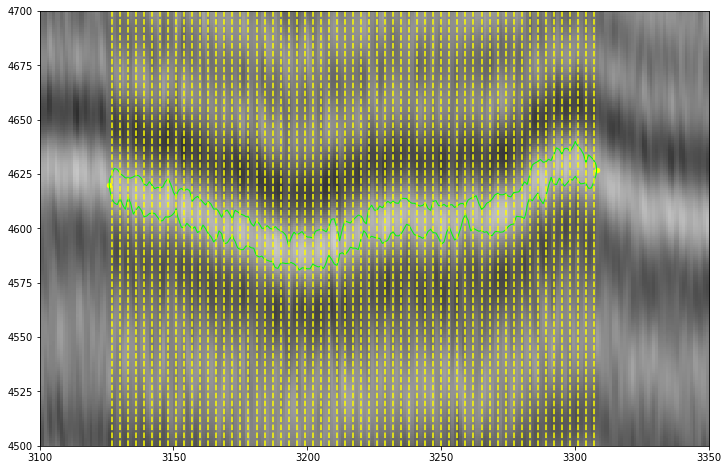

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.plot(last_long_contours[1][:, 1], last_long_contours[1][:, 0], color='lime', linewidth=1)

ax.scatter(last_long_contours[1][argx3, 1], last_long_contours[1][argx3, 0], color='yellow', marker='o', s=20)
ax.scatter(last_long_contours[1][argx4, 1], last_long_contours[1][argx4, 0], color='yellow', marker='o', s=20)

for x in range(int(np.around(last_long_contours[1][argx3, 1])), int(np.around(last_long_contours[1][argx4+1, 1])))[1::3]:
    ax.axvline(x=x, color='yellow', linestyle='--')

plt.xlim([3100, 3350])
plt.ylim([4500, 4700])
    
plt.show()

In [12]:
uniquex = (list(set([int(x) for x in last_long_contours[1][:, 1]])))
print(uniquex)

[3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 329

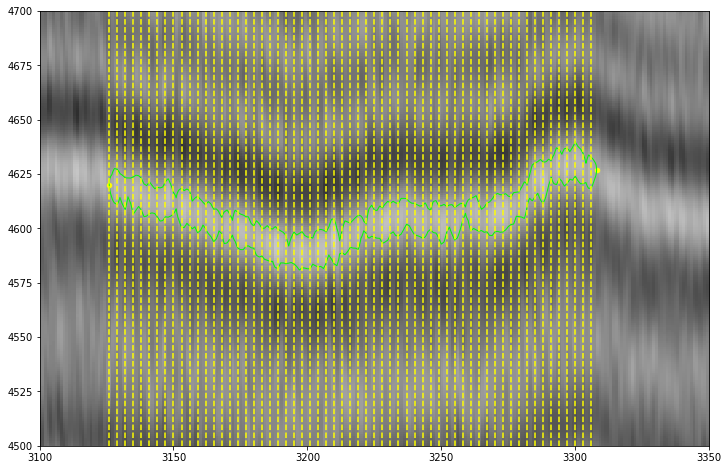

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.plot(last_long_contours[1][:, 1], last_long_contours[1][:, 0], color='lime', linewidth=1)

ax.scatter(last_long_contours[1][argx3, 1], last_long_contours[1][argx3, 0], color='yellow', marker='o', s=20)
ax.scatter(last_long_contours[1][argx4, 1], last_long_contours[1][argx4, 0], color='yellow', marker='o', s=20)

for x in uniquex[::3]:
    ax.axvline(x=x, color='yellow', linestyle='--')

plt.xlim([3100, 3350])
plt.ylim([4500, 4700])
    
plt.show()

In [13]:
saved_points2 = []
delete = []

for i, x in enumerate(uniquex):
    wherex = np.where(last_long_contours[1][:, 1]==x)[0]
    if len(wherex) == 0:
        delete.append(x)
    else:
        if len(wherex) > 2:
            saved_points2.append(wherex[1:3])
            print(i, wherex[1:3])
        else:
            saved_points2.append(wherex)
            print(i, wherex)
            
uniquex = [x for x in uniquex if x not in delete]
print(len(uniquex))

1 [422 433]
2 [418 437]
3 [417 439]
4 [414 444]
5 [412 449]
6 [410 452]
7 [409 459]
8 [408 463]
9 [407 469]
10 [405 472]
11 [404 475]
12 [402 478]
13 [398 482]
14 [396 483]
15 [393 485]
16 [390 487]
17 [388 489]
18 [387 491]
19 [386 494]
20 [384 495]
21 [381 498]
22 [379 499]
23 [376 500]
24 [371 502]
25 [368 506]
26 [364 513]
27 [362 517]
28 [360 518]
29 [358 521]
30 [356 523]
31 [350 526]
32 [348 528]
33 [346 531]
34 [344 532]
35 [342 536]
36 [339 539]
37 [336 542]
38 [334 544]
39 [330 548]
40 [329 551]
41 [327 555]
42 [324 557]
43 [321 563]
44 [319 565]
45 [316 568]
46 [312 570]
47 [306 573]
48 [304 578]
49 [302 579]
50 [301 580]
51 [299 582]
52 [298 583]
53 [294 584]
54 [292 586]
55 [289 590]
56 [287 592]
57 [284 594]
58 [283 597]
59 [281 598]
60 [278 600]
61 [277 601]
62 [275 605]
63 [273 606]
64 [271 610]
65 [270 611]
66 [267 613]
67 [261 615]
68 [256 616]
69 [252 618]
70 [249 620]
71 [247 623]
72 [245 625]
73 [242 626]
74 [241 627]
75 [239 628]
76 [238 631]
77 [234 633]
78 [232 

### find y values, ridge points

In [14]:
ridge_points2 = []

In [15]:
for i, point in enumerate(saved_points2):
    if(len(point == 2)):
        idx3 = point[0]
        idx4 = point[1]
    elif(len(point > 2)):
        idx3 = point[1]
        idx4 = point[2]
    else:
        raise ValueException("You need to have at least two matching y-values.")
    
    x = uniquex[i]
    
    y1 = int(last_long_contours[1][idx3, 0])
    y2 = int(last_long_contours[1][idx4, 0])
    
    if len(data[y2:y1, x]) == 0:
        print(i, x, np.where(data[:, x] == np.max(data[y1:y2, x]))[0])
        ridge_points2.append(np.where(data[:, x] == np.max(data[y1:y2, x]))[0])
    else:
        print(i, x, np.where(data[:, x] == np.max(data[y2:y1, x]))[0])
        ridge_points2.append(np.where(data[:, x] == np.max(data[y2:y1, x]))[0])

0 3127 [4619]
1 3128 [4620]
2 3129 [4619]
3 3130 [4620]
4 3131 [4618]
5 3132 [4616]
6 3133 [4619]
7 3134 [4617]
8 3135 [4615]
9 3136 [4617]
10 3137 [4617]
11 3138 [4616]
12 3139 [4613]
13 3140 [4613]
14 3141 [4614]
15 3142 [4614]
16 3143 [4613]
17 3144 [4612]
18 3145 [4611]
19 3146 [4612]
20 3147 [4614]
21 3148 [4614]
22 3149 [4613]
23 3150 [4612]
24 3151 [4612]
25 3152 [4611]
26 3153 [4610]
27 3154 [4609]
28 3155 [4610]
29 3156 [4609]
30 3157 [4606]
31 3158 [4607]
32 3159 [4607]
33 3160 [4606]
34 3161 [4607]
35 3162 [4605]
36 3163 [4605]
37 3164 [4604]
38 3165 [4601]
39 3166 [4602]
40 3167 [4603]
41 3168 [4601]
42 3169 [4600]
43 3170 [4601]
44 3171 [4601]
45 3172 [4600]
46 3173 [4601]
47 3174 [4600]
48 3175 [4599]
49 3176 [4598]
50 3177 [4599]
51 3178 [4599]
52 3179 [4597]
53 3180 [4596]
54 3181 [4596]
55 3182 [4595]
56 3183 [4594]
57 3184 [4593]
58 3185 [4594]
59 3186 [4593]
60 3187 [4592]
61 3188 [4592]
62 3189 [4591]
63 3190 [4592]
64 3191 [4591]
65 3192 [4590]
66 3193 [4588]
67 31

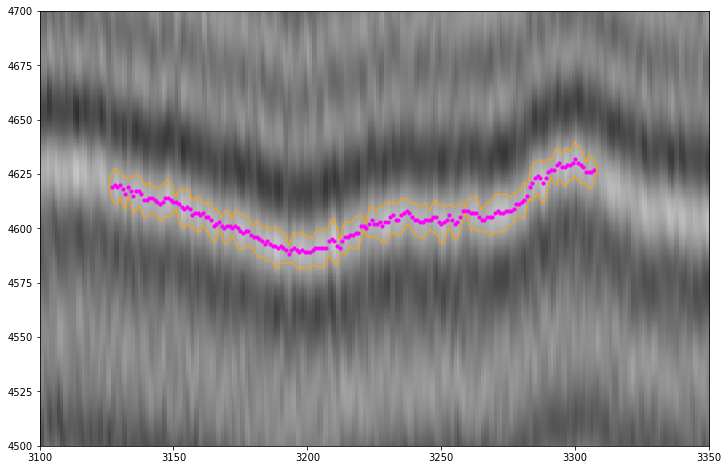

In [17]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.plot(last_long_contours[1][:, 1], last_long_contours[1][:, 0], color='orange', linewidth=1)

#ax.scatter(last_long_contours[1][argx3, 1], last_long_contours[1][argx3, 0], color='yellow', marker='o', s=10)
#ax.scatter(last_long_contours[1][argx4, 1], last_long_contours[1][argx4, 0], color='yellow', marker='o', s=10)

for i, x in enumerate(uniquex):
    y = ridge_points2[i]
    ax.scatter(x, y, color='magenta', marker='o', s=10)
    
plt.xlim([3100, 3350])
plt.ylim([4500, 4700])

#plt.savefig('actual_contour_ridge.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Let's try another point

In [18]:
z = 6
argx5 = np.argmin(last_long_contours[z][:, 1])
argx6 = np.argmax(last_long_contours[z][:, 1])

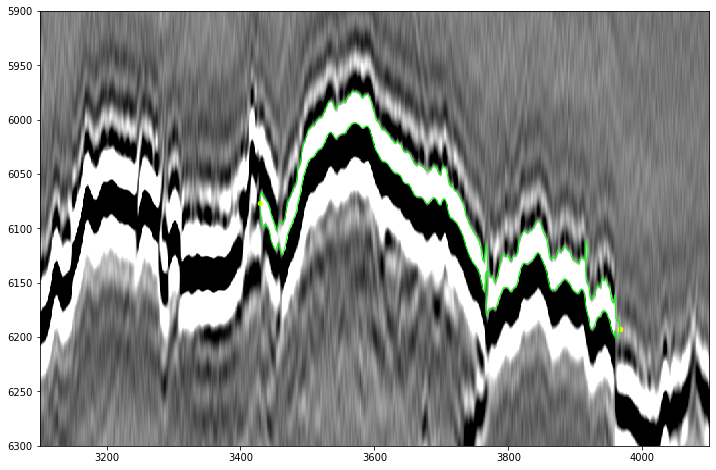

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.plot(last_long_contours[z][:, 1], last_long_contours[z][:, 0], color='lime', linewidth=1)

ax.scatter(last_long_contours[z][argx5, 1], last_long_contours[z][argx5, 0], color='yellow', marker='o', s=20)
ax.scatter(last_long_contours[z][argx6, 1], last_long_contours[z][argx6, 0], color='yellow', marker='o', s=20)

plt.xlim([3100, 4100])
plt.ylim([6300, 5900])

plt.show()

In [20]:
uniquex = (list(set([int(x) for x in last_long_contours[z][:, 1]])))
#print(uniquex)

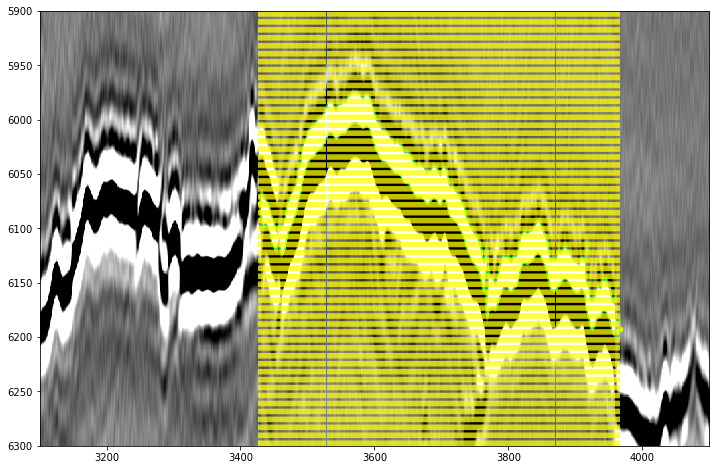

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.plot(last_long_contours[z][:, 1], last_long_contours[z][:, 0], color='lime', linewidth=1)

ax.scatter(last_long_contours[z][argx5, 1], last_long_contours[z][argx5, 0], color='yellow', marker='o', s=20)
ax.scatter(last_long_contours[z][argx6, 1], last_long_contours[z][argx6, 0], color='yellow', marker='o', s=20)

for x in uniquex[::3]:
    ax.axvline(x=x, color='yellow', linestyle='--')

plt.xlim([3100, 4100])
plt.ylim([6300, 5900])
    
plt.show()

In [22]:
saved_points2 = []
delete = []

for i, x in enumerate(uniquex):
    wherex = np.where(last_long_contours[z][:, 1]==x)[0]
    if len(wherex) == 0:
        delete.append(x)
    else:
        if len(wherex) > 2:
            saved_points2.append(wherex[1:3])
            print(i, wherex[1:3])
        else:
            saved_points2.append(wherex)
            print(i, wherex)
            
uniquex = [x for x in uniquex if x not in delete]
print(len(uniquex))

1 [1192 1200]
2 [1184 1206]
3 [1179 1209]
4 [1173 1211]
5 [1169 1213]
6 [1168 1216]
7 [1165 1218]
8 [1163 1220]
9 [1162 1222]
10 [1161 1224]
11 [1159 1226]
12 [1157 1228]
13 [1155 1230]
14 [1153 1232]
15 [1150 1235]
16 [1146 1239]
17 [1142 1242]
18 [1138 1246]
19 [1135 1248]
20 [1133 1251]
21 [1130 1253]
22 [1128 1257]
23 [1125 1260]
24 [1124 1263]
25 [1123 1266]
26 [1121 1268]
27 [1117 1270]
28 [1114 1275]
29 [1112 1278]
30 [1110 1279]
31 [1106 1281]
32 [1102 1282]
33 [1099 1284]
34 [1098 1285]
35 [1097 1286]
36 [1094 1288]
37 [1092 1290]
38 [1089 1293]
39 [1086 1297]
40 [1082 1302]
41 [1077 1308]
42 [1073 1312]
43 [1070 1315]
44 [1067 1317]
45 [1064 1319]
46 [1062 1321]
47 [1060 1324]
48 [1057 1327]
49 [1055 1329]
50 [1052 1331]
51 [1050 1334]
52 [1047 1336]
53 [1044 1338]
54 [1042 1340]
55 [1039 1343]
56 [1036 1347]
57 [1031 1356]
58 [1027 1362]
59 [1023 1364]
60 [1020 1366]
61 [1016 1368]
62 [1012 1373]
63 [1008 1379]
64 [1003 1385]
65 [ 999 1389]
66 [ 995 1392]
67 [ 992 1394]
68 [

In [23]:
ridge_points2 = []

In [24]:
for i, point in enumerate(saved_points2):
    if(len(point == 2)):
        idx3 = point[0]
        idx4 = point[1]
    elif(len(point > 2)):
        idx3 = point[1]
        idx4 = point[2]
    else:
        raise ValueException("You need to have at least two matching y-values.")
    
    x = uniquex[i]
    
    y1 = int(last_long_contours[z][idx3, 0])
    y2 = int(last_long_contours[z][idx4, 0])
    
    if len(data[y2:y1, x]) == 0:
        print(i, x, np.where(data[:, x] == np.max(data[y1:y2, x]))[0])
        ridge_points2.append(np.where(data[:, x] == np.max(data[y1:y2, x]))[0])
    else:
        print(i, x, np.where(data[:, x] == np.max(data[y2:y1, x]))[0])
        ridge_points2.append(np.where(data[:, x] == np.max(data[y2:y1, x]))[0])

0 3429 [6077]
1 3430 [6077]
2 3431 [6076]
3 3432 [6078]
4 3433 [6081]
5 3434 [6083]
6 3435 [6084]
7 3436 [6084]
8 3437 [6084]
9 3438 [6085]
10 3439 [6086]
11 3440 [6087]
12 3441 [6088]
13 3442 [6089]
14 3443 [6091]
15 3444 [6094]
16 3445 [6097]
17 3446 [6100]
18 3447 [6102]
19 3448 [6103]
20 3449 [6105]
21 3450 [6107]
22 3451 [6108]
23 3452 [6110]
24 3453 [6111]
25 3454 [6110]
26 3455 [6108]
27 3456 [6106]
28 3457 [6105]
29 3458 [6106]
30 3459 [6108]
31 3460 [6110]
32 3461 [6112]
33 3462 [6112]
34 3463 [6111]
35 3464 [6110]
36 3465 [6108]
37 3466 [6107]
38 3467 [6104]
39 3468 [6101]
40 3469 [6097]
41 3470 [6094]
42 3471 [6092]
43 3472 [6090]
44 3473 [6089]
45 3474 [6087]
46 3475 [6086]
47 3476 [6085]
48 3477 [6083]
49 3478 [6082]
50 3479 [6080]
51 3480 [6078]
52 3481 [6077]
53 3482 [6075]
54 3483 [6074]
55 3484 [6072]
56 3485 [6068]
57 3486 [6064]
58 3487 [6061]
59 3488 [6059]
60 3489 [6057]
61 3490 [6054]
62 3491 [6050]
63 3492 [6046]
64 3493 [6042]
65 3494 [6040]
66 3495 [6038]
67 34

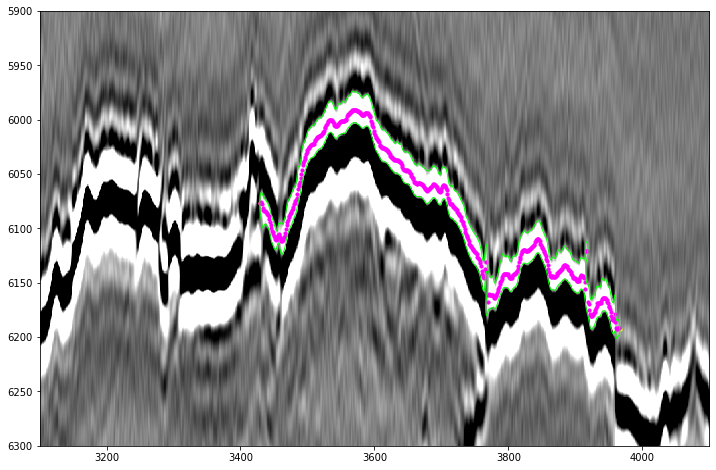

In [25]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

plt.plot(last_long_contours[z][:, 1], last_long_contours[z][:, 0], color='lime', linewidth=1)

ax.scatter(last_long_contours[z][argx5, 1], last_long_contours[z][argx5, 0], color='yellow', marker='o', s=10)
ax.scatter(last_long_contours[z][argx6, 1], last_long_contours[z][argx6, 0], color='yellow', marker='o', s=10)

for i, x in enumerate(uniquex):
    y = ridge_points2[i]
    ax.scatter(x, y, color='magenta', marker='o', s=10)
    
plt.xlim([3100, 4100])
plt.ylim([6300, 5900])

plt.show()

#### Now try to do for every point in `last_long_contours`

This means that we will need a list hold all of the ridge points for each contour. This is how this is going to work:
- find min and max x value for every contour: argx1, argx2 (<font color=red>Done!</font>)
- for every integer value in between those endpoint values, try to find what contour values are intersected there (<font color=red>Done!</font>)
- then find y values at those (hopefully two) points (<font color=red>Done!</font>)
- find ridge points (<font color=red>Done!</font>)
- find troughs? Needs work.

I either need to smooth the contours somehow, or figure something else out so that the ridge/trough structure is not so jumpy (mainly the troughs).

## I need to break apart this whole method into its constituent parts

#### Missing `find_contours()` method, for finding the actual contours

In [10]:
def find_contour_points(contour, argx_list):
    #first try to save argx list
    argx1 = np.argmin(contour[:, 1])
    argx2 = np.argmax(contour[:, 1])
    argx_list.append([argx1, argx2])
    
    #find uniquex values for each contour
    uniquex = (list(set([int(x) for x in contour[:, 1]])))
    
    #get rid of x values that we don't have contour data for
    saved_points = []
    delete = []

    for x in uniquex:
        wherex = np.where(contour[:, 1] == x)[0]
        if len(wherex) == 0:
            delete.append(x)
        else:
            if len(wherex) > 2:
                saved_points.append(wherex[1:3])
            else:
                saved_points.append(wherex)
    
    #delete values that we don't have enough data for
    uniquex = [x for x in uniquex if x not in delete]
    
    return uniquex, saved_points

In [11]:
def find_ridge_points(uniquex, saved_points, data, ridge_points):
    for i, point in enumerate(saved_points):
        if(len(point == 2)):
            idx1 = point[0]
            idx2 = point[1]
        elif(len(point > 2)):
            idx1 = point[1]
            idx2 = point[2]
        else:
            raise ValueException("You need to have at least two matching y-values.")

        x = uniquex[i]

        y1 = int(contour[idx1, 0])
        y2 = int(contour[idx2, 0])

        if len(data[y2:y1, x]) == 0:
            ridge_points.append(np.where(data[:, x] == np.max(data[y1:y2, x]))[0])
        else:
            ridge_points.append(np.where(data[:, x] == np.max(data[y2:y1, x]))[0])
        
    return [elem[0] for elem in ridge_points]

In [12]:
def find_troughs(uniquex, ridge_points, data):
    maxrows, maxcols = np.shape(data)
    
    top, bottom = [], []
    temptop_idx, tempbottom_idx = [], []
    temptop_points, tempbottom_points = [], []

    for i, point in enumerate(uniquex):
        row = ridge_points[i]
        col = point

        #if the point holds a positive value, then we want to
        #find the troughs on either side of it
        if data[row, col] > 0:
            #look for top contour
            for j in range(row, maxrows):
                #enter the trough
                if (data[j, col] <= 0):
                    #print(j)
                    temptop_idx.append(j)
                    temptop_points.append(data[j, col])

                    #enterting this if statement would signify leaving the trough
                    if data[j+1, col] > 0:
                        #find the minimum in that column of the trough
                        trough_min = np.argmin(temptop_points)
                        top.append(temptop_idx[trough_min])

                        #reset these to empty for the next column
                        temptop_idx, temptop_points = [], []
                        break

            #look for bottom contour
            for k in range(0, row):
                #enter the trough
                if (data[row-k, col] <= 0):
                    tempbottom_idx.append(row-k)
                    tempbottom_points.append(data[row-k, col])

                    #enterting this if statement would signify leaving the trough
                    if data[row-k-1, col] > 0:
                        #find the minimum in that column of the trough
                        trough_bottom_min = np.argmin(tempbottom_points)
                        bottom.append(tempbottom_idx[trough_bottom_min])

                        #reset these to empty for the next column
                        tempbottom_idx, tempbottom_points = [], []
                        break


        #if the point holds a negative value, then we want to
        #find the peaks on either side of it
        else:
            pass
            #### NEED TO IMPLEMENT THE SAME THING FOR NEGATIVE CONTOURS #####

    return top, bottom

Eventually, this &#9660;&#9660;&#9660;&#9660; will need to be be its own method.

In [13]:
#save lists
argx_list = []
uniquex_list = []
saved_points_list = []

ridge_points_list = []
top, bottom = [], []
top_list, bottom_list = [], []

In [14]:
for i, contour in enumerate(last_long_contours):
    #get shape of data
    maxrows, maxcols = np.shape(data)
    
    #find x values for contour and where along that contour that x value occurs (aka, y values)
    uniquex, saved_points = find_contour_points(contour, argx_list)
    uniquex_list.append(uniquex)
    saved_points_list.append(saved_points)
    
    #find y values and ridge points for each contour
    ridge_points = []
    ridge = find_ridge_points(uniquex, saved_points, data, ridge_points)
    ridge_points_list.append(ridge)
    
    #find top and bottom troughs/peaks
    top, bottom = find_troughs(uniquex, ridge, data)
    top_list.append(top)
    bottom_list.append(bottom)
    
    print(i, argx_list[i], len(uniquex_list[i]), len(saved_points_list[i]), len(ridge_points_list[i]))

0 [406, 847] 156 156 156
1 [427, 914] 181 181 181
2 [288, 664] 96 96 96
3 [882, 1653] 281 281 281
4 [361, 744] 172 172 172
5 [921, 2827] 850 850 850
6 [1196, 2497] 538 538 538
7 [113, 886] 177 177 177
8 [78, 967] 203 203 203
9 [0, 458] 209 209 209
10 [2229, 3750] 646 646 646
11 [16, 554] 162 162 162
12 [292, 4081] 1657 1657 1657
13 [45, 420] 125 125 125
14 [517, 1242] 237 237 237
15 [81, 371] 129 129 129
16 [2669, 5485] 580 580 580
17 [225, 4662] 2280 2280 2280
18 [382, 0] 85 85 85
19 [291, 1020] 168 168 168
20 [181, 413] 75 75 75
21 [511, 1180] 224 224 224
22 [620, 2275] 671 671 671
23 [4, 333] 110 110 110
24 [25, 329] 141 141 141
25 [291, 558] 90 90 90
26 [10, 320] 157 157 157
27 [229, 547] 63 63 63
28 [509, 2166] 450 450 450
29 [251, 530] 62 62 62


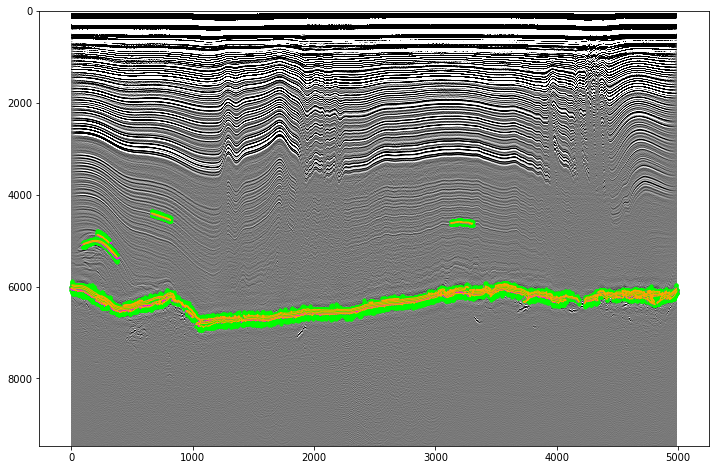

In [157]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))

#plot grid
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

for i, contour in enumerate(last_long_contours):
    #plot contours
    ax.plot(contour[:, 1], contour[:, 0], color='orange', linewidth=1)

    #plot ridge points
    ridge = ridge_points_list[i]
    uniqx = uniquex_list[i]
    top_ = top_list[i]
    bottom_ = bottom_list[i]
    
    for j, x in enumerate(uniqx):
        t = top_[j]
        r = ridge[j]
        b = bottom_[j]
        
        ax.scatter(x, t, color='lime', marker='o', s=10)
        ax.scatter(x, r, color='magenta', marker='o', s=10)
        ax.scatter(x, b, color='lime', marker='o', s=10)
        
plt.show()

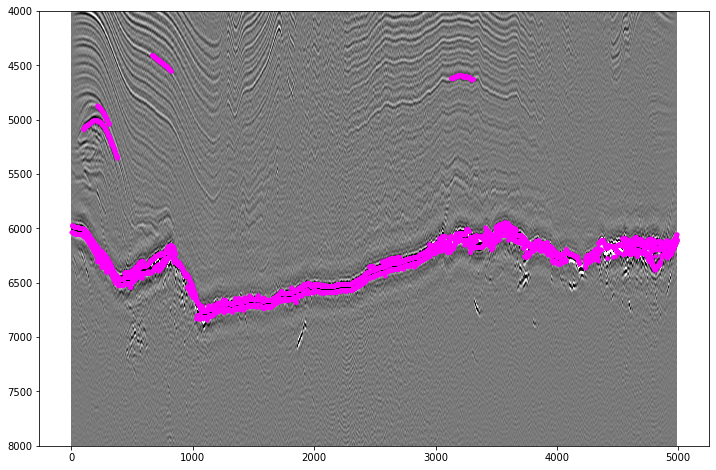

In [34]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))

#plot grid
ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

for i in range(len(ridge_points_list)):
    #plot ridge points
    ridge = ridge_points_list[i]
    uniqx = uniquex_list[i]
    
    for j, x in enumerate(uniqx):
        r = ridge[j]
        ax.scatter(x, r, color='magenta', marker='o', s=10)
        
ax.set_ylim(8000, 4000)
        
plt.show()

<IPython.core.display.Javascript object>


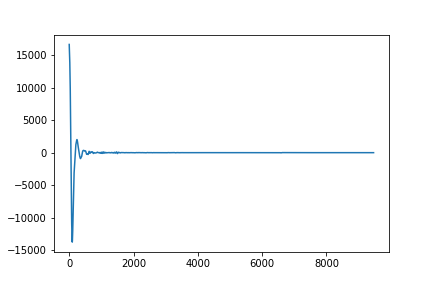

In [44]:
%matplotlib inline
plt.plot(data[:, 1000])
plt.show()

<IPython.core.display.Javascript object>


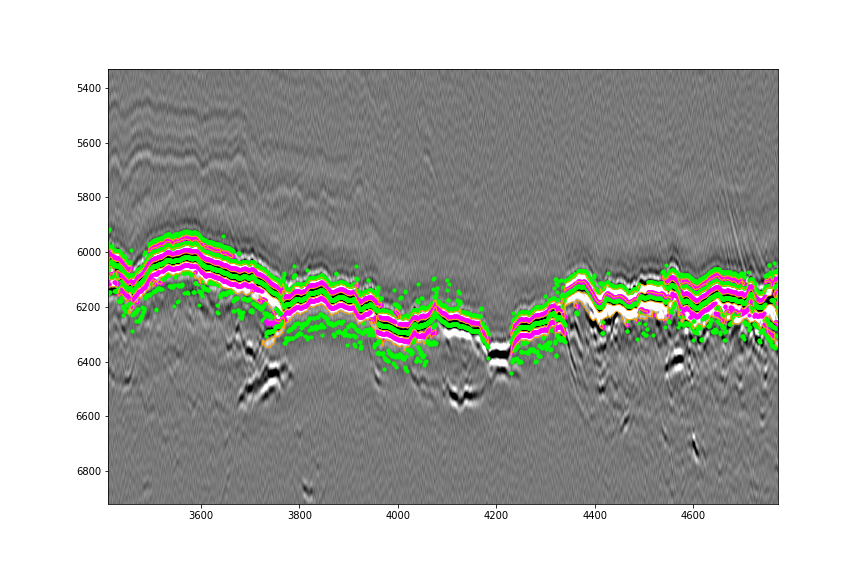

In [45]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))

#plot grid
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

for i, contour in enumerate(last_long_contours):
    #plot contours
    ax.plot(contour[:, 1], contour[:, 0], color='orange', linewidth=1)

    #plot ridge points
    ridge = ridge_points_list[i]
    uniqx = uniquex_list[i]
    top_ = top_list[i]
    bottom_ = bottom_list[i]
    
    for j, x in enumerate(uniqx):
        r = ridge[j]
        t = top_[j]
        b = bottom_[j]
        
        ax.scatter(x, r, color='magenta', marker='o', s=10)
        ax.scatter(x, t, color='lime', marker='o', s=10)
        ax.scatter(x, b, color='lime', marker='o', s=10)

ax.set_ylim(3400, 4800)
ax.set_ylim(6900, 5600)

plt.show()

Not ideal for the bed, but this method seems to work well for internal reflectors in the middle of the ice sheet. Ben mentioned putting constraints on the search, where we could give a frequency and (when converted to distance) only search from the ridge to that distance.

Some questions I have for this method:
- how could we determine a frequency to give to the algorithm automatically?
- what would happen if we didn't find anything? store a NaN value?
- what does that do to the average power along the sameples? **could use np.nanmean() and np.nansum()**

In [18]:
power = []

for i in range(len(ridge_points_list)):
    t_ = np.array(top_list[i])
    r_ = np.array(ridge_points_list[i])
    b_ = np.array(bottom_list[i])
    
    pick_power = np.mean(np.sum(t_**2 + r_**2 + b_**2))
    power.append(pick_power)

<IPython.core.display.Javascript object>


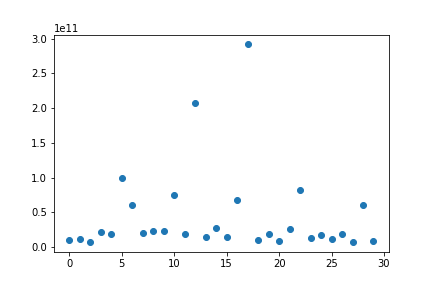

In [20]:
powerx = list(range(len(power)))

plt.scatter(powerx, power)

plt.show()

I wonder if we could separate the contours based on their power content. Bed picks have super low averaged power, then a layer above, and again for the contours above those.

Maybe cluster them into regimes of where they are in the ice?